# 

# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [198]:
# only library allowed do not modify
import pandas as pd
from src.sql import execute_query

In [199]:
#example query inside docstring
execute_query("""
        SELECT DISTINCT Sentiment
        FROM train_table
""")

,Sentiment
0,Neutral
1,Positive
2,Extremely Negative
3,Negative
4,Extremely Positive


In [200]:
#example query inside docstring
execute_query("""
        SELECT *
        FROM train_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,7484,9996,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,train
1,1,3593,2338,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,train
2,2,12246,5091,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,train
3,3,5237,10266,None,16-03-2020,My food stock is not the only one which is emp...,Positive,train
4,4,14067,3014,None,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,train
...,...,...,...,...,...,...,...,...
41152,41152,10280,14781,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,train
41153,41153,10605,1158,None,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,train
41154,41154,4884,1029,None,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,train
41155,41155,9052,7736,None,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,train


In [201]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,5663,6254,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,test
1,1,12784,7766,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,test
2,2,3859,7150,None,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,test
3,3,6815,9068,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,test
4,4,1381,8708,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,test
...,...,...,...,...,...,...,...,...
3793,3793,7916,11906,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,test
3794,3794,14679,3726,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,test
3795,3795,6342,3112,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,test
3796,3796,13676,1776,None,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,test


## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [202]:
# write query inside docstring
query_1 = """
    SELECT UserName, Location, COUNT(*) AS count
    FROM train_table
    GROUP BY location
    ORDER BY count DESC
    LIMIT 10;
"""

In [203]:
result_1 = execute_query(query_1)

In [204]:
result_1

,UserName,Location,count
0,5237,None,8590
1,7484,London,540
2,2954,United States,528
3,5616,"London, England",520
4,774,"New York, NY",395
5,12487,"Washington, DC",373
6,6126,United Kingdom,337
7,8272,"Los Angeles, CA",281
8,10820,India,268
9,3593,UK,232


## Question 2: Intermediate SQL


In [205]:
# write query inside docstring
query_2 = """
    SELECT 
        UserName,
        COUNT(CASE WHEN Sentiment = 'Positive' THEN 1 END) AS pos_count,
        COUNT(CASE WHEN Sentiment = 'Negative' THEN 1 END) AS neg_count,
        COUNT(CASE WHEN Sentiment = 'Extremely Positive' THEN 1 END) AS extremely_pos_count,
        COUNT(CASE WHEN Sentiment = 'Extremely Negative' THEN 1 END) AS extremely_neg_count
    FROM 
        train_table
    GROUP BY 
        UserName
    ORDER BY UserName DESC;
"""

In [206]:
result_2 = execute_query(query_2)

In [207]:
result_2

,UserName,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,14983,0,0,0,1
1,14981,2,0,0,0
2,14980,2,0,0,0
3,14979,1,0,2,0
4,14978,0,0,0,1
...,...,...,...,...,...
13994,4,1,0,1,0
13995,3,1,0,0,1
13996,2,0,1,0,0
13997,1,2,0,2,0


## Question 3: Medium SQL

In [208]:
query_3 = """
    SELECT 
        TweetAt,
        (COUNT(CASE WHEN Sentiment = 'Positive' THEN 1 END) + COUNT(CASE WHEN Sentiment = 'Extremely Positive' THEN 1 END)) * 1.0 / 
        (
            (COUNT(CASE WHEN Sentiment = 'Negative' THEN 1 END) + COUNT(CASE WHEN Sentiment = 'Extremely Negative' THEN 1 END)) + 
            (COUNT(CASE WHEN Sentiment = 'Positive' THEN 1 END) + COUNT(CASE WHEN Sentiment = 'Extremely Positive' THEN 1 END))
        ) AS pos_rate
    FROM 
        train_table
    GROUP BY 
        TweetAt
--    ORDER BY 
--        pos_rate DESC;
"""

In [209]:
result_3 = execute_query(query_3)

In [210]:
result_3

,TweetAt,pos_rate
0,01-04-2020,0.512871
1,02-04-2020,0.520584
2,03-04-2020,0.525915
3,04-04-2020,0.566719
4,05-04-2020,0.573661
5,06-04-2020,0.544139
6,07-04-2020,0.550034
7,08-04-2020,0.589050
8,09-04-2020,0.605396
9,10-04-2020,0.592689


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

In [211]:

def plot_positive_sentiment_rate(result_3):
    result_3['TweetAt'] = pd.to_datetime(result_3['TweetAt'], format='%d-%m-%Y')
    result_3.set_index('TweetAt', inplace=True)
    daily_pos_rate = result_3['pos_rate'].resample('D').mean()
    daily_pos_rate.plot(title='Positive Sentiment', ylabel='Positive Sentiment Rate', legend=['pos_rate'])

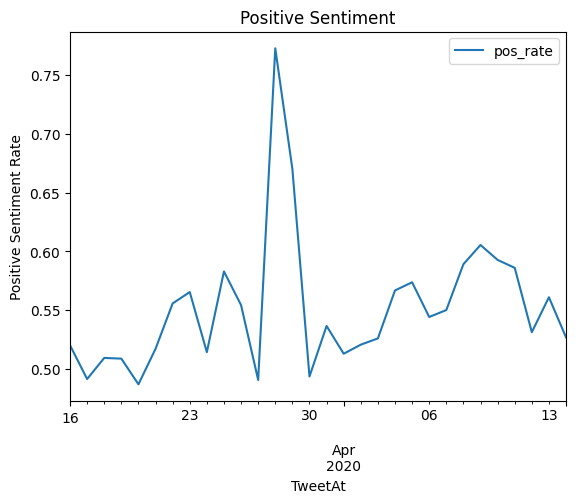

In [212]:
plot_positive_sentiment_rate(result_3)

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5

In [213]:
import csv
from datetime import datetime

class Data:
    def __init__(self, data: list):
        """Inicializa la clase Data con una lista de listas."""
        self.data = data  # Almacena los datos CSV
    
    def infer_dtypes(self):
        """Infiera los tipos de datos para cada columna (fecha, entero, flotante)."""
        inferred_types = []
        num_columns = len(self.data[0])  # Supón que la primera fila es la cabecera
        
        # Comprobar el tipo de cada columna a través de las filas
        for col_idx in range(num_columns):
            column_values = [row[col_idx] for row in self.data[1:]]  # Excluir la fila de cabecera
            col_type = self._infer_column_type(column_values)
            inferred_types.append(col_type)
        
        return inferred_types

    def _infer_column_type(self, column_values):
        """Método auxiliar para inferir el tipo de datos de una columna."""
        for value in column_values:
            if self._is_date(str(value)):  # Asegúrate de que el valor sea una cadena
                return 'date'
            elif self._is_integer(value):
                return 'int'
            elif self._is_float(value):
                return 'float'
        return 'str'  # Por defecto, si no es ninguno de los anteriores, es un string
    
    def _is_date(self, value):
        """Comprueba si una cadena es una fecha válida."""
        try:
            # Convierte el valor a string y luego intenta analizarlo
            datetime.strptime(str(value), '%Y-%m-%d')  # Asumiendo formato YYYY-MM-DD
            return True
        except ValueError:
            return False

    def _is_integer(self, value):
        """Comprueba si una cadena o valor es un entero."""
        try:
            int(value)
            return True
        except ValueError:
            return False
    
    def _is_float(self, value):
        """Comprueba si una cadena o valor es un flotante."""
        try:
            float(value)
            return True
        except ValueError:
            return False

    def describe(self):
        """Genera estadísticas básicas para cada columna numérica."""
        num_columns = len(self.data[0])
        statistics = {}
        
        # Obtener estadísticas solo para columnas numéricas
        for col_idx in range(num_columns):
            column_values = [row[col_idx] for row in self.data[1:]]  # Excluir la fila de cabecera
            inferred_type = self._infer_column_type(column_values)
            
            if inferred_type in ['int', 'float']:
                column_values = [float(v) if v != 'NaN' else float('nan') for v in column_values]
                statistics[self.data[0][col_idx]] = self._compute_stats(column_values)
        
        return statistics

    def _compute_stats(self, values):
        """Calcula la media, desviación estándar, mínimo y máximo de una lista de valores numéricos."""
        valid_values = [v for v in values if not (isinstance(v, float) and v != v)]  # Filtra NaNs
        if not valid_values:
            return {"mean": "NaN", "std": "NaN", "min": "NaN", "max": "NaN"}
        
        mean = sum(valid_values) / len(valid_values)
        std_dev = (sum((x - mean) ** 2 for x in valid_values) / len(valid_values)) ** 0.5
        minimum = min(valid_values)
        maximum = max(valid_values)
        
        return {"mean": mean, "std": std_dev, "min": minimum, "max": maximum}

class DataReader:
    def __init__(self):
        self.data = None
    
    def read_csv(self, file_path: str):
        """Lee el archivo CSV y devuelve un objeto Data."""
        data = []
        with open(file_path, 'r') as file:
            # Lee el archivo línea por línea
            for line in file:
                row = self._process_line(line.strip())
                data.append(row)
        
        # Devuelve un objeto Data con los datos cargados
        return Data(data)
    
    def _process_line(self, line: str):
        """Procesa una línea para dividir los valores y reemplazar datos inválidos con NaN."""
        values = line.split(',')
        processed_values = [self._process_value(value) for value in values]
        return processed_values

    def _process_value(self, value: str):
        """Intenta convertir un valor a entero, flotante, fecha o dejarlo como cadena."""
        if self._is_date(value):
            return value  # Mantén como cadena de fecha (se puede procesar más si es necesario)
        elif self._is_integer(value):
            return int(value)
        elif self._is_float(value):
            return float(value)
        else:
            return "NaN"  # Valor inválido reemplazado por NaN

    def _is_date(self, value):
        """Comprueba si una cadena es una fecha válida."""
        try:
            datetime.strptime(value, '%Y-%m-%d')  # Asumiendo formato YYYY-MM-DD
            return True
        except ValueError:
            return False

    def _is_integer(self, value):
        """Comprueba si una cadena es un entero."""
        try:
            int(value)
            return True
        except ValueError:
            return False
    
    def _is_float(self, value):
        """Comprueba si una cadena es un flotante."""
        try:
            float(value)
            return True
        except ValueError:
            return False


In [214]:
reader = DataReader()
data_object = reader.read_csv(r"D:\Downloads\PowerBI\ejemplo.csv")

# Inferir tipos de columnas
column_types = data_object.infer_dtypes()
print(column_types)

# Obtener estadísticas básicas de las columnas numéricas
stats = data_object.describe()
print(stats)


['int', 'int', 'date']
{'NaN': {'mean': 37.833333333333336, 'std': 15.768745458448283, 'min': 12.1, 'max': 67.8}}
